Assignment 8, Aslan Smagulov

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [32]:
def y1(x):
    return (3998*(math.exp(-x))-2999*(math.exp(-1000*x)))/(999)

In [33]:
def y2(x):
    return (2999*(math.exp(-1000*x))-2000*(math.exp(-x)))/(999)

In [34]:
def dy1(x):
    return 999*y1(x)+1999*y2(x)

In [35]:
def dy2(x):
    return -1000*y1(x)-2000*y2(x)

In [57]:
#Explicit Euler
def Euler1(a,b,h,df1,df2,y1,y2): 
    
    n=(b-a)/h
    d=[]
    e=[]
    f=[]
    g=[]
    it=[]
    f1=np.zeros(int(n+1))
    f2=np.zeros(int(n+1))
    error1=np.zeros(int(n+1))
    error2=np.zeros(int(n+1))
    for i in range (0,int(n)):
        it.append(i)
        f1[0]=1
        f2[0]=1
        f1[i+1]=f1[i]+df1(f1[i])*h
        f2[i+1]=f2[i]+df2(f2[i])*h
       
        d.append(f1[i])
        e.append(f2[i])
        error1[i]=abs(d[i]-y1(a+i*h))
        error2[i]=abs(e[i]-y2(a+i*h))
        f.append(error1[i])
        g.append(error2[i])
    return it,d,e,f,g



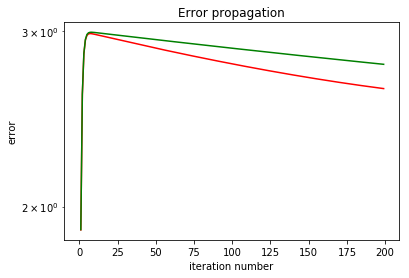

In [142]:
it1,d1,e1,er1,er2=Euler1(0,0.2,0.001,dy1,dy2,y1,y2)
plt.plot(it1,er1,'r')
plt.plot(it1,er2,'g')
plt.yscale('log')
plt.title('Error propagation')
plt.ylabel("error")
plt.xlabel("iteration number")
plt.show()
#red line-error for y1,green line-error for y2

The sharp step at the beginning is explained by initial condition which is equal to first term of f1 and f2,therefore error is 0 
Approximately at stepsize is less than of order E-4,the solution tends to be stable, larger than that the solution is unstable. Error decreses with stepsize with order of sheme


In [62]:
def Midpoint(a,b,h,df1,df2,y1,y2):
    n=(b-a)/h
    d=[]
    e=[]
    f=[]
    g=[]
    it=[]
    f1=np.zeros(int(n+1))
    f2=np.zeros(int(n+1))
    error1=np.zeros(int(n+1))
    error2=np.zeros(int(n+1))
    
    for i in range (0,int(n)):
        it.append(i)
        f1[0]=1
        f2[0]=1
        f1[i+1]=f1[i]+df1(f1[i])*h/2
        f2[i+1]=f2[i]+df2(f2[i])*h/2
        
        d.append(f1[i])
        e.append(f2[i])
        error1[i]=abs(d[i]-y1(a+i*h))
        error2[i]=abs(e[i]-y2(a+i*h))
        f.append(error1[i])
        g.append(error2[i])
    return it,d,e,f,g



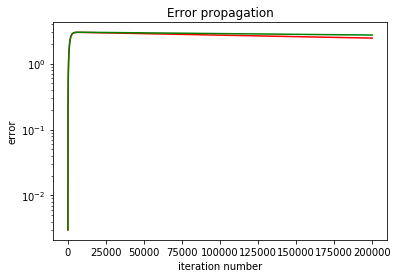

In [137]:
it1,d1,e1,er1,er2=Midpoint(0,0.2,0.000001,dy1,dy2,y1,y2)
x=[0,0.2]
plt.plot(it1,er1,'r')
plt.plot(it1,er2,'g')
plt.yscale('log')
plt.title('Error propagation')
plt.ylabel("error")
plt.xlabel("iteration number")
plt.show()
#red line-error for y1,green line-error for y2


stable: stepsize <E-6, otherwise unstable. Needs extremely small stepsize in magnitude to minimize the error. Agrees with order of sheme.

In [64]:
def RK4(a,b,h,df1,df2,y1,y2):
    n=(b-a)/h
    d=[]
    e=[]
    f=[]
    g=[]
    it=[]
    f1=np.zeros(int(n+1))
    f2=np.zeros(int(n+1))
    error1=np.zeros(int(n+1))
    error2=np.zeros(int(n+1))
    for i in range (0,int(n)):
        it.append(i)
        f1[0]=1
        f2[0]=1
        k1=df1(f1[i])
        k2=df1(f1[i]+k1/2*h)
        k3=df1(f1[i]+k2/2*h)
        k4=df1(f1[i]+k3*h)
        
        g1=df2(f2[i])
        g2=df2(f2[i]+g1/2*h)
        g3=df2(f2[i]+g2/2*h)
        g4=df2(f2[i]+g3*h)
        
        f1[i+1]=f1[i]+1/6*(k1+2*k2+2*k3+2*k4)*h
        f2[i+1]=f2[i]+1/6*(g1/6+2*g2+2*g3+g4)*h
        d.append(f1[i])
        e.append(f2[i])
        error1[i]=abs(d[i]-y1(a+i*h))
        error2[i]=abs(e[i]-y2(a+i*h))
        f.append(error1[i])
        g.append(error2[i])
    return it,d,e,f,g


    

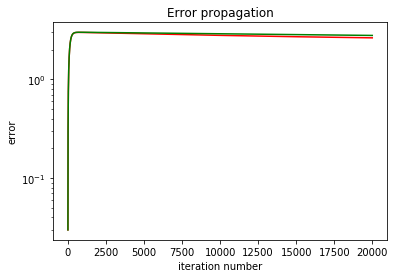

In [139]:
it1,d1,e1,er1,er2=Euler1(0,0.2,0.00001,dy1,dy2,y1,y2)
plt.plot(it1,er1,'r')
plt.plot(it1,er2,'g')
plt.yscale('log')
plt.title('Error propagation')
plt.ylabel("error")
plt.xlabel("iteration number")
plt.show()
#red line-error for y1,green line-error for y2


Stable: stepsize<E-5,otherwise is unstable.Error decreases with stepsize approximately like in euler's explicit method and agrees the order of sheme

In [132]:
#Implicit Euler
def Euler2(a,b,h,df1,df2,y1,y2): 
    
    n=(b-a)/h
    d=[]
    e=[]
    f=[]
    g=[]
    it=[]
    
    f1=np.zeros(int(n+1))
    f2=np.zeros(int(n+1))
    error1=np.zeros(int(n+1))
    error2=np.zeros(int(n+1))
    
    for i in range (int(n),0,-1):
        it.append(i)
        f1[int(n)]=(3999*math.exp(-0.2)-2999*math.exp(-200))/999
        f2[int(n)]=(2999*math.exp(-200)-200*math.exp(-0.2))/999
        f1[i-1]= f1[i]-df1(f1[i])*h
        f2[i-1]= f2[i]-df2(f2[i])*h
        d.append(f1[i])
        e.append(f2[i])
        error1[i]=abs(d[i]-y1(b-i*h))
        error2[i]=abs(e[i]-y2(b-i*h))
        f.append(error1[i])
        g.append(error2[i])
    return it,d,e,f,g


